In [11]:
# Import Keras Packages
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# Initializing CNN Layers
model = Sequential()

In [13]:
# First Convolution
# 64 Filters which are 3x3
# Input image sizes are formatted 150x150 and 3 channels (Red, Blue, Green)
# Using ReLU for our activation function
model.add(Conv2D(32, kernel_size=(3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [14]:
# Max Pooling Layer 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

In [15]:
model.add(Flatten())

In [16]:
# Fully Connecting Layer
model.add(Dense(128, activation = 'relu'))

# Return a categorical outcome
model.add(Dense(3, activation = 'softmax'))

In [17]:
# Compile the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
# Fitting the CNN to the images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/seg_train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/seg_test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7057 images belonging to 3 classes.
Found 1509 images belonging to 3 classes.


In [19]:
model.fit_generator(training_set,
                    epochs = 15,
                    validation_data = test_set)

Epoch 1/15
221/221 [==============================] - 43s 194ms/step - loss: 0.5636 - acc: 0.7549 - val_loss: 0.3662 - val_acc: 0.8496
Epoch 2/15
221/221 [==============================] - 59s 266ms/step - loss: 0.3951 - acc: 0.8300 - val_loss: 0.3140 - val_acc: 0.8807
Epoch 3/15
221/221 [==============================] - 51s 230ms/step - loss: 0.3676 - acc: 0.8401 - val_loss: 0.3636 - val_acc: 0.8608
Epoch 4/15
221/221 [==============================] - 47s 211ms/step - loss: 0.3421 - acc: 0.8578 - val_loss: 0.3699 - val_acc: 0.8429
Epoch 5/15
221/221 [==============================] - 45s 202ms/step - loss: 0.3325 - acc: 0.8633 - val_loss: 0.2841 - val_acc: 0.8926
Epoch 6/15
221/221 [==============================] - 50s 227ms/step - loss: 0.2951 - acc: 0.8808 - val_loss: 0.3387 - val_acc: 0.8741
Epoch 7/15
221/221 [==============================] - 50s 226ms/step - loss: 0.2993 - acc: 0.8776 - val_loss: 0.5670 - val_acc: 0.7753
Epoch 8/15
221/221 [==============================] - 5

In [20]:
epoch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
loss = [0.5636, 0.3951, 0.3676, 0.3421, 0.3325, 0.2951, 0.2993, 0.2721, 0.2470, 0.2600, 0.2278, 0.2282, 0.2188, 0.2062, 0.1969]
acc = [0.7549, 0.8300, 0.8401, 0.8578, 0.8633, 0.8808, 0.8776, 0.8944, 0.9047, 0.8927, 0.9102, 0.9104, 0.9186, 0.9211, 0.9228]

Text(0.5, 1.0, 'Loss Graph (64x64)')

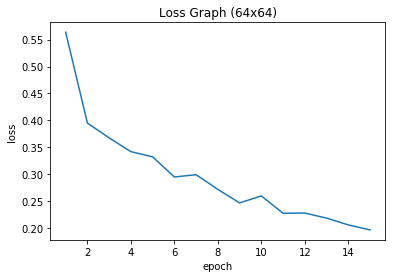

In [21]:
plt.plot(epoch, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss Graph (64x64)')

Text(0.5, 1.0, 'Acc Graph (64x64)')

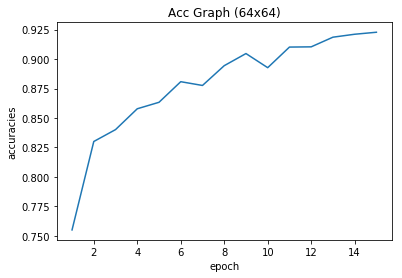

In [22]:
plt.plot(epoch, acc)
plt.xlabel('epoch')
plt.ylabel('accuracies')
plt.title('Acc Graph (64x64)')